<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Linear Algebra Basics</h2>

[Source](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/)     
[Github](https://github.com/hadrienj/deepLearningBook-Notes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 2 on linear algebra from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts. You can check the syllabus in the [introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Introduction

We have seen in [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) some interesting kind of matrices. We will see other type of vectors and matrices in this chapter. It is not a big chapter but it is important to understand the next ones.

# 2.6 Special Kinds of Matrices and Vectors

<img src="images/diagonal-and-symmetric-matrices.png" width="400" alt="Diagonal and symmetric matrices" title="Diagonal and symmetric matrices">
<em>Example of diagonal and symmetric matrices</em>


# Diagonal matrices

<img src="images/diagonal-matrix.png" width="150" alt="Example of a diagonal matrix" title="Diagonal matrix">
<em>Example of a diagonal matrix</em>

A matrix $\bs{A}_{i,j}$ is diagonal if its entries are all zeros except on the diagonal (when $i=j$).

### Example 1.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

In this case the matrix is also square but there can be non square diagonal matrices.

### Example 2.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

Or

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0
\end{bmatrix}
$$

The diagonal matrix can be denoted $diag(\bs{v})$ where $\bs{v}$ is the vector containing the diagonal values.

### Example 3.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

In this matrix, $\bs{v}$ is the following vector:

$$
\bs{v}=
\begin{bmatrix}
    2\\\\
    4\\\\
    3\\\\
    1
\end{bmatrix}
$$

The Numpy function `diag()` can be used to create square diagonal matrices:

In [4]:
v = np.array([2, 4, 3, 1])
np.diag(v)

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

The mutliplication between a diagonal matrix and a vector is thus just a ponderation of each element of the vector by $v$:

### Example 4.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

and

$$
\bs{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}
$$

$$
\begin{align*}
&\bs{Dx}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix} \times
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}\\\\
&=\begin{bmatrix}
    2\times3 + 0\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 4\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 3\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 0\times2 + 1\times7
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    1\times7
\end{bmatrix}
\end{align*}
$$

Non square matrices have the same properties:

### Example 5.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

and

$$
\bs{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
$$

$$
\bs{Dx}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    0
\end{bmatrix}
$$

The invert of a square diagonal matrix exists if all entries of the diagonal are non-zeros. If it is the case, the invert is easy to find. Also, the inverse doen't exist if the matrix is non-square.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
\bs{D}^{-1}=
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}
$$

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}=
\begin{bmatrix}
    1 & 0 & 0 & 0\\\\
    0 & 1 & 0 & 0\\\\
    0 & 0 & 1 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

Let's check with Numpy that the multiplication of the matrix with its invert gives us the identity matrix:

In [5]:
A = np.array([[2, 0, 0, 0], [0, 4, 0, 0], [0, 0, 3, 0], [0, 0, 0, 1]])
A

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [6]:
A_inv = np.array([[1/2., 0, 0, 0], [0, 1/4., 0, 0], [0, 0, 1/3., 0], [0, 0, 0, 1/1.]])
A_inv

array([[0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [7]:
A.dot(A_inv)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Great! This gives the identity matrix

# Symmetric matrices

<img src="images/symmetric-matrix.png" width="150" alt="Illustration of a symmetric matrix" title="Symmetric matrix">
<em>Illustration of a symmetric matrix</em>

The matrix $A$ is symmetric if it is equal to its transpose:
    
$$
\bs{A} = \bs{A}^\text{T}
$$

This concerns only square matrices.

### Example 6.

$$
\bs{A}=
\begin{bmatrix}
    2 & 4 & -1\\\\
    4 & -8 & 0\\\\
    -1 & 0 & 3
\end{bmatrix}
$$

In [8]:
A = np.array([[2, 4, -1], [4, -8, 0], [-1, 0, 3]])
A

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

In [9]:
A.T

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

# Unit vectors

A unit vector is a vector of length equal to 1. It can be denoted by a letter with a hat: $\hat{u}$

# Orthogonal vectors

Two orthogonal vectors are separated by a 90° angle. The dot product of two orthogonal vectors gives 0.

### Example 7.

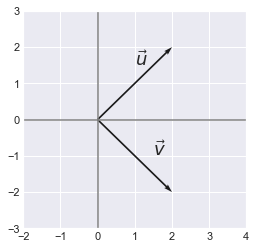

In [10]:
x = [0,0,2,2]
y = [0,0,2,-2]

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

plt.show()
plt.close()

$$
\bs{x}= 
\begin{bmatrix}
    2\\\\
    2
\end{bmatrix}
$$

and

$$
\bs{y}=
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}
$$

$$
\bs{x^\text{T}y}=
\begin{bmatrix}
    2 & 2
\end{bmatrix}
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}=
\begin{bmatrix}
    2\times2 + 2\times-2
\end{bmatrix}=0
$$

In addition, when the norm of orthogonal vectors is the unit norm they are called **orthonormal**.

<span class='pquote'>
    It is impossible to have more than $n$ vectors mutually orthogonal in $\mathbb{R}^n$.
</span>

It is impossible to have more than $n$ vectors mutually orthogonal in $\mathbb{R}^n$. For instance try to draw 3 vectors in a 2-dimensional space ($\mathbb{R}^2$) that are mutually orthogonal...


# Orthogonal matrices

Orthogonal matrices are important because they have interesting properties. A matrix is orthogonal if columns are mutually orthogonal and have a unit norm (orthonormal) and rows are mutually orthonormal and have unit norm. 


<img src="images/orthogonal-matrix.png" width="300" alt="Under the hood of an orthogonal matrix" title="Under the hood of an orthogonal matrix">
<em>Under the hood of an orthogonal matrix</em>

$$
\bs{A}= 
\begin{bmatrix}
    A_{1,1} & A_{1,2}\\\\
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

This means that 

$$
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}
\end{bmatrix}
$$

and 

$$
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}
\end{bmatrix}
$$

are orthogonal vectors and also that the rows

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2}
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

are orthogonal vectors (cf. above for definition of orthogonal vectors).

## Property 1: $\bs{A^\text{T}A}=\bs{I}$


A orthogonal matrix has this property:

$$
\bs{A^\text{T}A}=\bs{AA^\text{T}}=\bs{I}
$$

We can see that this statement is true with the following reasoning:

Let's have the following matrix:

$$
\bs{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
$$

and thus

$$
\bs{A}^\text{T}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
$$

Let's do the product:

$$
\begin{align*}
&\bs{A^\text{T}A}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
=
\begin{bmatrix}
    aa + cc & ab + cd\\\\
    ab + cd & bb + dd
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    a^2 + c^2 & ab + cd\\\\
    ab + cd & b^2 + d^2
\end{bmatrix}
\end{align*}
$$

We saw in [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/) that the norm of the vector $\begin{bmatrix}
    a & c
\end{bmatrix}$ is equal to $a^2+c^2$ ($L^2$ or squared $L^2$). In addtion, we saw that the rows of $\bs{A}$ have a unit norm because $\bs{A}$ is orthogonal. This means that $a^2+c^2=1$ and $b^2+d^2=1$. So we now have:

$$
\bs{A^\text{T}A}=
\begin{bmatrix}
    1 & ab + cd\\\\
    ab + cd & 1
\end{bmatrix}
$$

Also, $ab+cd$ corresponds to the product of $\begin{bmatrix}
    a & c
\end{bmatrix} and \begin{bmatrix}
    b & d
\end{bmatrix}$:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}
=
ab+cd
$$

And we know that the columns are orthogonal which means that:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}=0
$$

We thus have the identity matrix:

$$
\bs{A^\text{T}A}=\begin{bmatrix}
    1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

## Property 2: $\bs{A}^\text{T}=\bs{A}^{-1}$

We can show that if $\bs{A^\text{T}A}=\bs{I}$ then $
\bs{A}^\text{T}=\bs{A}^{-1}$.

If we multiply each side of the equation $\bs{A^\text{T}A}=\bs{I}$ by $\bs{A}^{-1}$ we have:

$$
(\bs{A^\text{T}A})\bs{A}^{-1}=\bs{I}\bs{A}^{-1}
$$

Recall from [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) that a matrix or vector doesn't change when it is multiplied by the identity matrix. So we have:

$$
(\bs{A^\text{T}A})\bs{A}^{-1}=\bs{A}^{-1}
$$

We also saw in [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/) that matrix multiplication is associative so we can remove the parenthesis:

$$
\bs{A^\text{T}A}\bs{A}^{-1}=\bs{A}^{-1}
$$

We also know that $\bs{A}\bs{A}^{-1}=\bs{I}$ (see [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/)) so we can replace:

$$
\bs{A^\text{T}}\bs{I}=\bs{A}^{-1}
$$

This shows that

$$\bs{A}^\text{T}=\bs{A}^{-1}$$

You can refer to [this question](https://math.stackexchange.com/questions/1936020/why-is-the-inverse-of-an-orthogonal-matrix-equal-to-its-transpose).

### Example 8.

Sine and cosine are convenient to create orthogonal matrices. Let's take the following matrix:

$$
\bs{A}= 
\begin{bmatrix}
    cos(50) & -sin(50)\\\\
    sin(50) & cos(50)
\end{bmatrix}
$$

In [11]:
A = np.array([[np.cos(50), -np.sin(50)], [np.sin(50), np.cos(50)]])
A

array([[ 0.96496603,  0.26237485],
       [-0.26237485,  0.96496603]])

In [12]:
col0 = A[:, [0]]
col1 = A[:, [1]]
row0 = A[0].reshape(A.shape[1], 1)
row1 = A[1].reshape(A.shape[1], 1)

Let's check that rows and columns are orthogonal:

In [13]:
col0.T.dot(col1)

array([[0.]])

In [14]:
row0.T.dot(row1)

array([[0.]])

Let's check that

$$
\bs{A^\text{T}A}=\bs{AA^\text{T}}=\bs{I}
$$

and thus

$$
\bs{A}^\text{T}=\bs{A}^{-1}
$$

In [15]:
A.T.dot(A)

array([[1., 0.],
       [0., 1.]])

In [16]:
A.T

array([[ 0.96496603, -0.26237485],
       [ 0.26237485,  0.96496603]])

In [17]:
numpy.linalg.inv(A)

array([[ 0.96496603, -0.26237485],
       [ 0.26237485,  0.96496603]])

Everything is correct!

# Conclusion

In this chapter we saw different interesting type of matrices with specific properties. It is generally useful to recall them while we deal with this kind of matrices.

In the next chapter we will saw a central idea in linear algebra: the eigendecomposition. Keep reading!

# References

## Inverse and transpose of orthogonal matrix

- https://math.stackexchange.com/questions/1936020/why-is-the-inverse-of-an-orthogonal-matrix-equal-to-its-transpose

- https://dyinglovegrape.wordpress.com/2010/11/30/the-inverse-of-an-orthogonal-matrix-is-its-transpose/